In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [4]:
df = pd.read_csv("user_behavior_dataset.csv")
df

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


In [5]:
df.columns = [
    "Kullanıcı Adı",
    "Cihaz Modeli",
    "İşletim Sistemi",
    "Uygulama Kullanma Süresi (dk/gün)",
    "Ekran Süresi (saat/gün)",
    "Pil Tüketimi (mAh/gün)",
    "İndirilen Uyg Sayısı",
    "İnternet Kullanımı (MB/gün)",
    "Yaş",
    "Cinsiyet",
    "Kullanıcı Davranış Sınıfı"
]

print(df.head())

   Kullanıcı Adı    Cihaz Modeli İşletim Sistemi  \
0              1  Google Pixel 5         Android   
1              2       OnePlus 9         Android   
2              3    Xiaomi Mi 11         Android   
3              4  Google Pixel 5         Android   
4              5       iPhone 12             iOS   

   Uygulama Kullanma Süresi (dk/gün)  Ekran Süresi (saat/gün)  \
0                                393                      6.4   
1                                268                      4.7   
2                                154                      4.0   
3                                239                      4.8   
4                                187                      4.3   

   Pil Tüketimi (mAh/gün)  İndirilen Uyg Sayısı  İnternet Kullanımı (MB/gün)  \
0                    1872                    67                         1122   
1                    1331                    42                          944   
2                     761                    32         

In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Kullanıcı Adı                      700 non-null    int64  
 1   Cihaz Modeli                       700 non-null    object 
 2   İşletim Sistemi                    700 non-null    object 
 3   Uygulama Kullanma Süresi (dk/gün)  700 non-null    int64  
 4   Ekran Süresi (saat/gün)            700 non-null    float64
 5   Pil Tüketimi (mAh/gün)             700 non-null    int64  
 6   İndirilen Uyg Sayısı               700 non-null    int64  
 7   İnternet Kullanımı (MB/gün)        700 non-null    int64  
 8   Yaş                                700 non-null    int64  
 9   Cinsiyet                           700 non-null    object 
 10  Kullanıcı Davranış Sınıfı          700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


,Kullanıcı Adı,Uygulama Kullanma Süresi (dk/gün),Ekran Süresi (saat/gün),Pil Tüketimi (mAh/gün),İndirilen Uyg Sayısı,İnternet Kullanımı (MB/gün),Yaş,Kullanıcı Davranış Sınıfı
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


In [7]:
df.isnull().sum()

Kullanıcı Adı                        0
Cihaz Modeli                         0
İşletim Sistemi                      0
Uygulama Kullanma Süresi (dk/gün)    0
Ekran Süresi (saat/gün)              0
Pil Tüketimi (mAh/gün)               0
İndirilen Uyg Sayısı                 0
İnternet Kullanımı (MB/gün)          0
Yaş                                  0
Cinsiyet                             0
Kullanıcı Davranış Sınıfı            0
dtype: int64

In [14]:
df["Cihaz Modeli"].unique()

array(['Google Pixel 5', 'OnePlus 9', 'Xiaomi Mi 11', 'iPhone 12',
       'Samsung Galaxy S21'], dtype=object)

In [16]:
df["Cihaz Modeli"].value_counts()

Cihaz Modeli
Xiaomi Mi 11          146
iPhone 12             146
Google Pixel 5        142
OnePlus 9             133
Samsung Galaxy S21    133
Name: count, dtype: int64

In [24]:
df.groupby("Cihaz Modeli")[["Yaş"]].mean().reset_index()

,Cihaz Modeli,Yaş
0,Google Pixel 5,37.767606
1,OnePlus 9,38.879699
2,Samsung Galaxy S21,39.112782
3,Xiaomi Mi 11,37.767123
4,iPhone 12,38.958904


In [26]:
df["İşletim Sistemi"].unique()

array(['Android', 'iOS'], dtype=object)

In [28]:
df.groupby("Yaş")[["Ekran Süresi (saat/gün)"]].mean().reset_index()

,Yaş,Ekran Süresi (saat/gün)
0,18,5.490909
1,19,4.750000
2,20,5.547059
3,21,6.376471
4,22,6.304167
5,23,4.906667
6,24,5.314286
7,25,4.390476
8,26,4.428571
9,27,5.075000


In [30]:
df.groupby("Cinsiyet")[["İnternet Kullanımı (MB/gün)"]].mean().reset_index()

,Cinsiyet,İnternet Kullanımı (MB/gün)
0,Female,914.321429
1,Male,943.978022


(array([10., 20., 30., 40., 50., 60., 70.]),
 [Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70')])

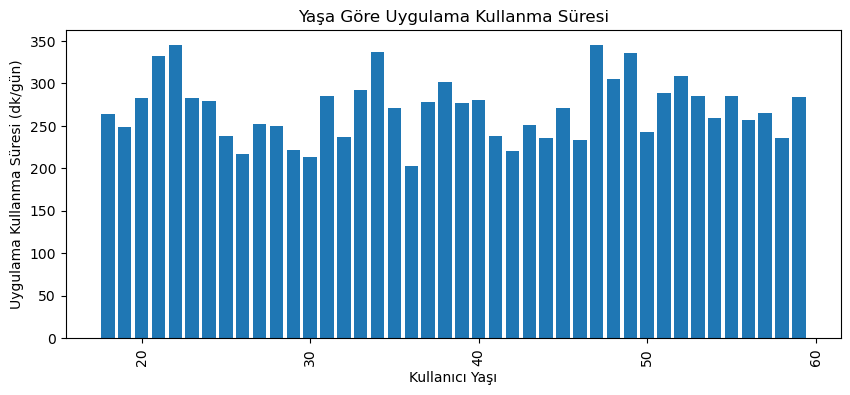

In [40]:
uyg_kullanim = df.groupby("Yaş")[["Uygulama Kullanma Süresi (dk/gün)"]].mean().reset_index()

plt.figure(figsize=(10,4))
plt.bar(uyg_kullanim["Yaş"], uyg_kullanim["Uygulama Kullanma Süresi (dk/gün)"])
plt.xlabel("Kullanıcı Yaşı")
plt.ylabel("Uygulama Kullanma Süresi (dk/gün)")
plt.title("Yaşa Göre Uygulama Kullanma Süresi")
plt.xticks(rotation=90)

In [34]:
df.groupby(["Cihaz Modeli","Kullanıcı Adı"])[["Pil Tüketimi (mAh/gün)"]].mean().reset_index()

,Cihaz Modeli,Kullanıcı Adı,Pil Tüketimi (mAh/gün)
0,Google Pixel 5,1,1872.0
1,Google Pixel 5,4,1676.0
2,Google Pixel 5,6,940.0
3,Google Pixel 5,11,435.0
4,Google Pixel 5,16,2571.0
...,...,...,...
695,iPhone 12,669,1039.0
696,iPhone 12,671,387.0
697,iPhone 12,680,334.0
698,iPhone 12,692,856.0


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Google Pixel 5'),
  Text(1, 0, 'OnePlus 9'),
  Text(2, 0, 'Samsung Galaxy S21'),
  Text(3, 0, 'Xiaomi Mi 11'),
  Text(4, 0, 'iPhone 12')])

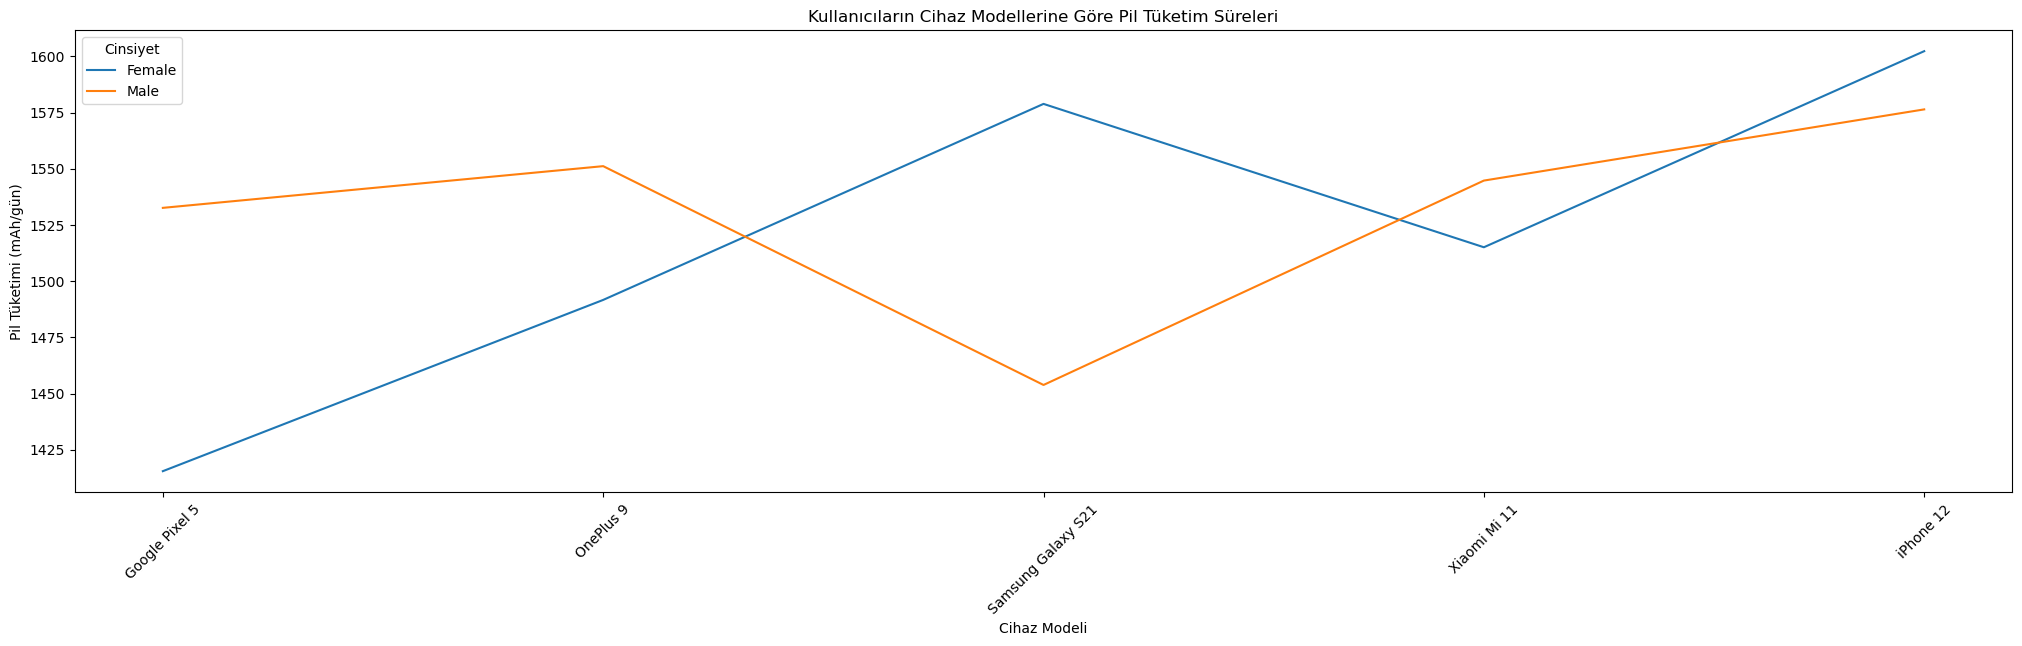

In [48]:
pil_tuketim = df.groupby(["Cinsiyet","Cihaz Modeli"])[["Pil Tüketimi (mAh/gün)"]].mean().reset_index()

plt.figure(figsize=(25,6))
sns.lineplot(x="Cihaz Modeli", y="Pil Tüketimi (mAh/gün)", hue="Cinsiyet", data=pil_tuketim)
plt.xlabel("Cihaz Modeli")
plt.ylabel("Pil Tüketimi (mAh/gün)")
plt.title("Kullanıcıların Cihaz Modellerine Göre Pil Tüketim Süreleri")
plt.xticks(rotation=45)